In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# HW 1 (Problem 1)
# Sophia Godfrey
# Student ID: 801149485

In [40]:
filePath="D3.csv"

# Load dataset
df = pd.read_csv(filePath, index_col=False)

# Display the first 5 rows of the DataFrame
print(df.head())

         X1        X2        X3         Y
0  0.000000  3.440000  0.440000  4.387545
1  0.040404  0.134949  0.888485  2.679650
2  0.080808  0.829899  1.336970  2.968490
3  0.121212  1.524848  1.785455  3.254065
4  0.161616  2.219798  2.233939  3.536375


In [41]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    errors = predictions - y
    sqrErrors = np.square(errors)
    J = (1 / (2 * m)) * np.sum(sqrErrors)
    return J

In [42]:
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        sum_delta = (alpha / m) * X.T.dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [43]:
def run_single_variable_regression(x, y, alpha=0.05, iterations=1000, feature_name="x"):
    m = len(y)
    X = np.c_[np.ones(m), x]          # Add intercept
    y = y.values.reshape(-1, 1)       # Column vector
    theta = np.zeros((X.shape[1], 1)) # Shape (2,1)

    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

    # Flatten theta to 1D array (shape: 2,)
    theta = theta.flatten()

    final_cost = cost_history[-1]
    return theta, cost_history



Training model for x1 with alpha=0.01

Training model for x1 with alpha=0.05

Training model for x1 with alpha=0.1


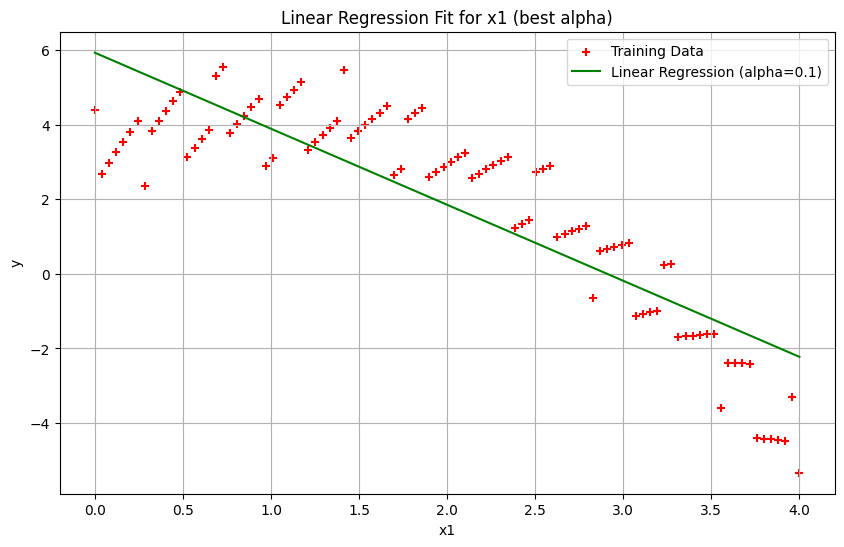

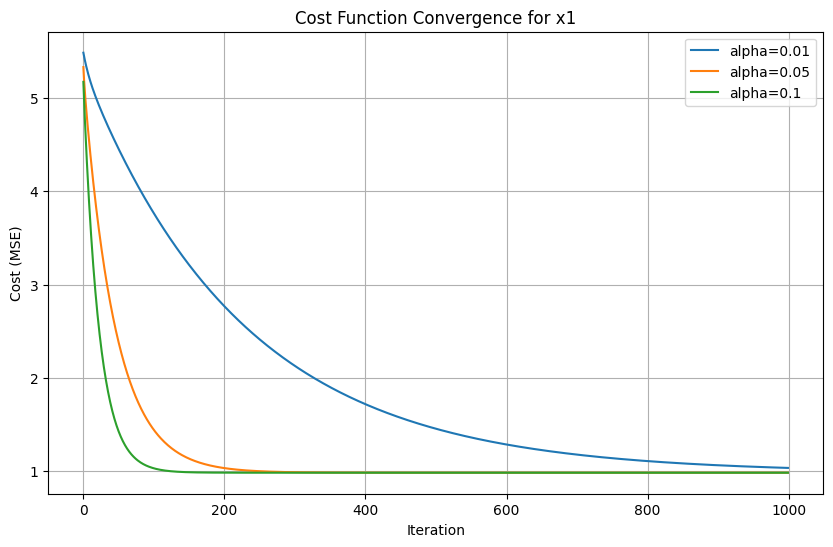


Training model for x2 with alpha=0.01

Training model for x2 with alpha=0.05

Training model for x2 with alpha=0.1


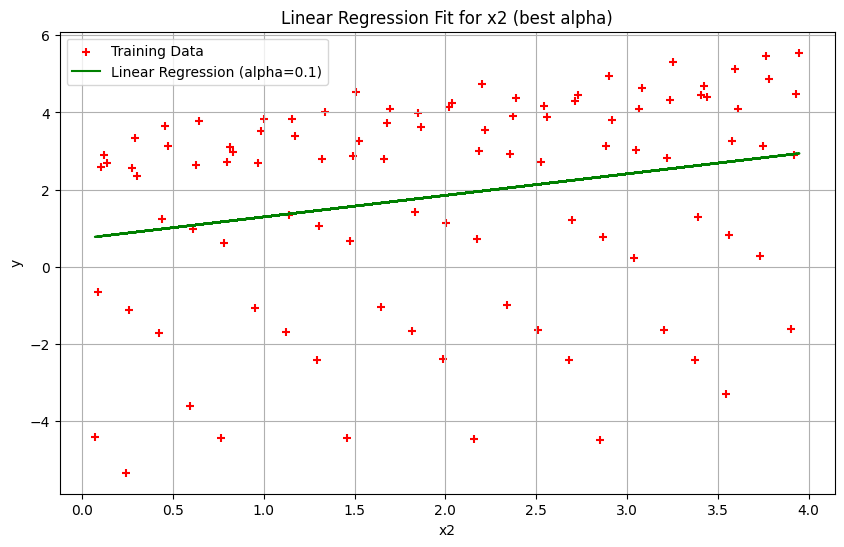

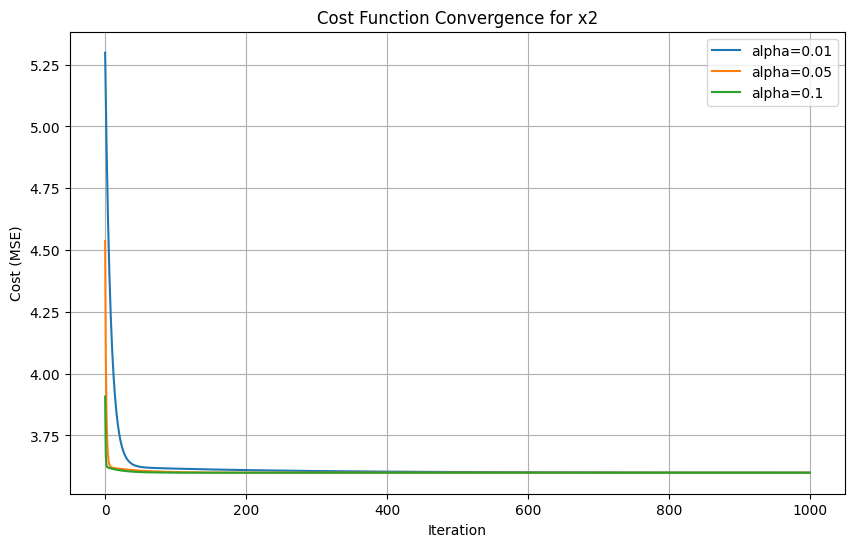


Training model for x3 with alpha=0.01

Training model for x3 with alpha=0.05

Training model for x3 with alpha=0.1


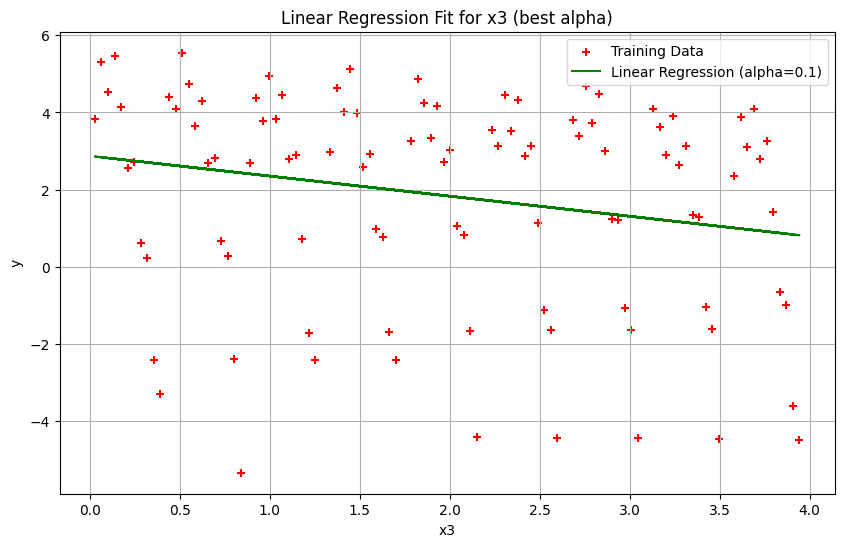

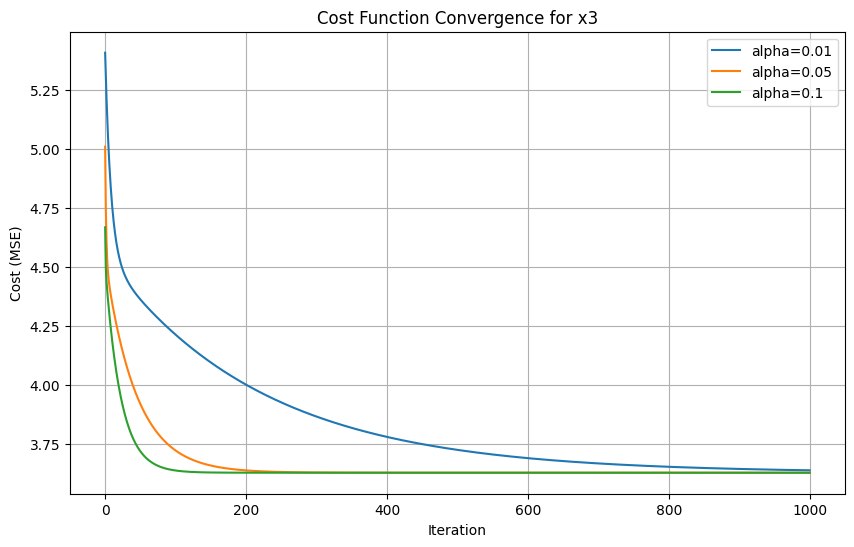


=== Comparison of Results ===
  Variable  Alpha     Slope  Intercept  Final Cost
0       x1   0.01 -1.791191   5.292947    1.036436
1       x1   0.05 -2.038304   5.927864    0.984993
2       x1   0.10 -2.038337   5.927949    0.984993
3       x2   0.01  0.576695   0.687020    3.599673
4       x2   0.05  0.557610   0.736054    3.599366
5       x2   0.10  0.557608   0.736060    3.599366
6       x3   0.01 -0.409651   2.591187    3.639660
7       x3   0.05 -0.520470   2.871389    3.629451
8       x3   0.10 -0.520483   2.871422    3.629451

Best explanatory variable: x1 (alpha=0.1, cost=0.9850)


In [44]:
# Separate explanatory vars and target
x1, x2, x3, y = df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], df.iloc[:,3]

# Learning rates to test
learning_rates = [0.01, 0.05, 0.1]

# Store results
results = []

for var, name in zip([x1, x2, x3], ["x1", "x2", "x3"]):
    cost_histories = {}  # Store cost history for each learning rate
    best_cost = float("inf")
    best_theta = None
    best_alpha = None

    for alpha in learning_rates:
        print(f"\nTraining model for {name} with alpha={alpha}")
        theta, cost_history = run_single_variable_regression(var, y, alpha=alpha, iterations=1000, feature_name=name)

        # Ensure theta is a numpy array
        theta = np.array(theta).reshape(-1)  # shape (2,)
        results.append((name, alpha, theta[1], theta[0], cost_history[-1]))

        cost_histories[alpha] = cost_history

        # Keep track of the best model for fit plot
        if cost_history[-1] < best_cost:
            best_cost = cost_history[-1]
            best_theta = theta
            best_alpha = alpha

    # Plot regression fit using best alpha
    plt.rcParams["figure.figsize"] = (10, 6)
    plt.scatter(var, y, color='red', marker='+', label='Training Data')
    plt.plot(var, np.c_[np.ones(len(var)), var].dot(best_theta), color='green', label=f'Linear Regression (alpha={best_alpha})')
    plt.title(f'Linear Regression Fit for {name} (best alpha)')
    plt.xlabel(name)
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Plot cost vs iterations for all learning rates on one chart
    plt.rcParams["figure.figsize"] = (10, 6)
    for alpha, history in cost_histories.items():
        plt.plot(range(len(history)), history, label=f'alpha={alpha}')
    plt.title(f'Cost Function Convergence for {name}')
    plt.xlabel('Iteration')
    plt.ylabel('Cost (MSE)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Compare results
results_df = pd.DataFrame(results, columns=["Variable", "Alpha", "Slope", "Intercept", "Final Cost"])
print("\n=== Comparison of Results ===")
print(results_df)

# Identify best variable (lowest cost overall)
best_row = results_df.loc[results_df["Final Cost"].idxmin()]
print(f"\nBest explanatory variable: {best_row['Variable']} (alpha={best_row['Alpha']}, cost={best_row['Final Cost']:.4f})")
